# System Identification With Python

I need to analyse some data. This is part of that analysis.

Would You Like To Know More: 

- https://www.youtube.com/watch?v=9itsq4_qNZo
- http://lpsa.swarthmore.edu/Transient/TransInputs/TransStep.html
- https://ocw.mit.edu/courses/mathematics/18-03sc-differential-equations-fall-2011/unit-iii-fourier-series-and-laplace-transform/unit-step-and-unit-impulse-response/MIT18_03SCF11_s25_2text.pdf
- http://web.mit.edu/2.151/www/Handouts/FirstSecondOrder.pdf


## Part 1: Generate Fake Data

To identify data we need to have some known data to identify.

In [1]:
import random
# Parallel Path
import control.matlab
from scipy import signal
#
import numpy as np
import matplotlib
%matplotlib inline
def pct_err(experimental, theoretical):
    return np.abs((experimental-theoretical)/theoretical) * 100

### First Order System

In [9]:
K = random.randint(1, 10)
tau = random.randint(1, 10)
t0  = 1
dT = 1e-4

In [10]:
sys1 = control.matlab.tf(K, [tau, 1])
sys2 = signal.lti(K, [tau, 1])

In [11]:
T = np.arange(0, t0+tau*10, dT)

In [12]:
X = np.zeros(np.shape(T))

In [13]:
X[T>=t0]=1

In [14]:
Y1, T1, xout = control.matlab.lsim(sys1, U=X, T=T, X0=X[0])

In [15]:
T2a, Y2a, xout = signal.lsim(sys2, U=X, T=T, X0=X[0])
T2b, Y2b, xout = signal.lsim2(sys2, U=X, T=T, X0=X[0])

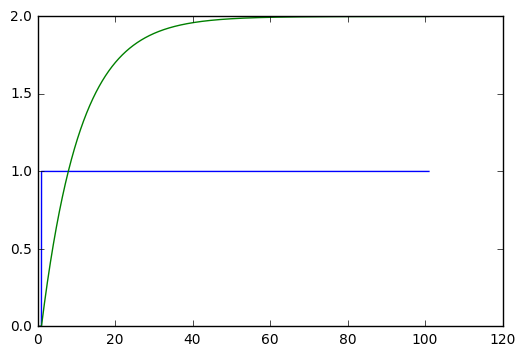

In [16]:
matplotlib.pyplot.plot(T1, X, T1, Y1)

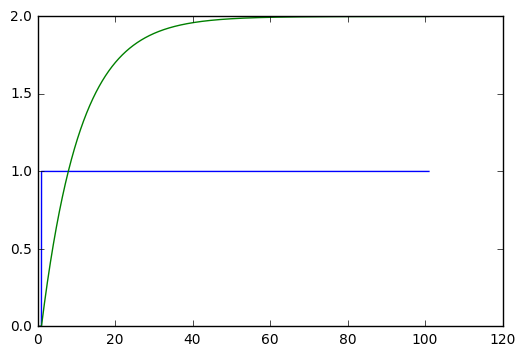

In [17]:
matplotlib.pyplot.plot(T2a, X, T2a, Y2a)

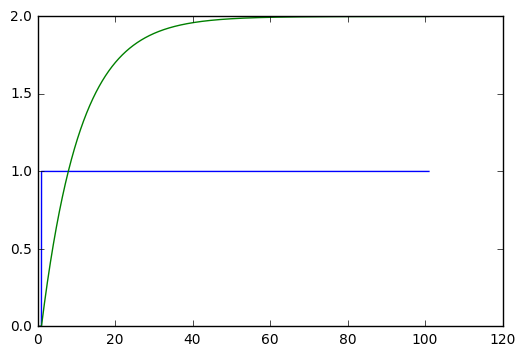

In [18]:
matplotlib.pyplot.plot(T2b, X, T2b, Y2b)

### Part 2: Analyze Fake Data

In [23]:
def stepID1(T, X, Y):
    X_0 = X[0]
    X_final = X[-1]

    Y_0 = Y[0]
    Y_final = Y[-1]
    tau_est = list()

    K_est = (Y_final-Y_0) / (X_final - X_0)

    for i in range(1,4):
        Y_ = (1-np.exp(-i))*(Y_final-Y_0)
        idx1 = np.where(Y_>=Y1)[0][-1]
        idx2 = np.where(Y_<=Y1)[0][0]

        tau_est.append(T[idx1]/i)
        tau_est.append(T[idx2]/i)
    print(tau_est)
    tau_est = np.mean(tau_est)

    return K_est, tau_est

In [24]:
X = np.array([0, 1])

In [25]:
(K, tau)

(2, 10)

In [22]:
K_guess, tau_guess = stepID1(T, X, Y1)

[10.9991, 10.9992, 10.4985, 10.49855, 10.330400000000001, 10.330433333333334]


In [30]:
assert pct_err(K, K_guess)<0.1
pct_err(tau, tau_guess-t0)

4.0651609786865981

In [31]:
stepID1(T, X, Y2a)

[10.9991, 10.9992, 10.4985, 10.49855, 10.330400000000001, 10.330433333333334]


(1.999909199659859, 10.609363888888888)

In [32]:
stepID1(T, X, Y2b)

[10.9991, 10.9992, 10.4985, 10.49855, 10.330400000000001, 10.330433333333334]


(1.999909193513431, 10.609363888888888)

In [35]:
np.sin(np.arange(0,1e-4,2*np.pi))

array([ 0.])

In [36]:
?np.arange

In [40]:
T=np.arange(0,10,1e-4)
Y=np.sin(T)

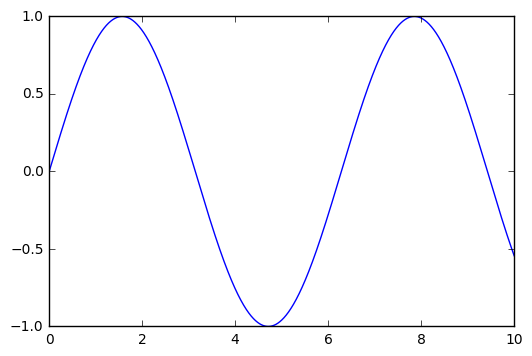

In [41]:
matplotlib.pyplot.plot(T,Y)

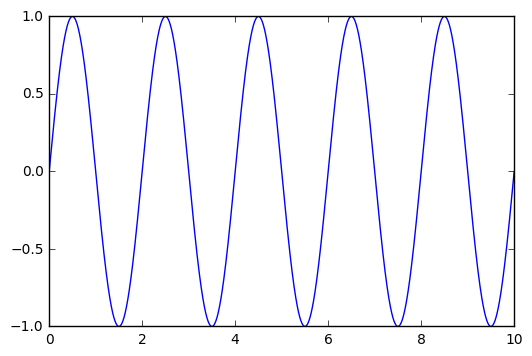

In [44]:
T=np.arange(0,10,1e-4)
Y=np.sin(2*np.pi*0.5*T)
matplotlib.pyplot.plot(T,Y)

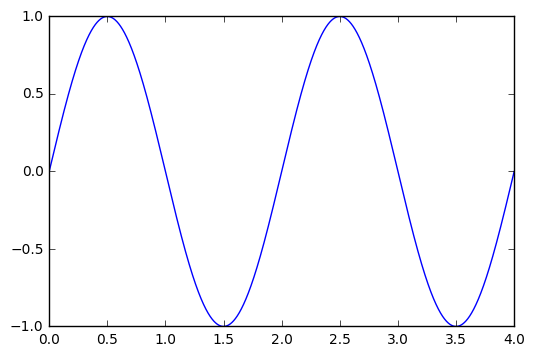

In [48]:
cycles = 2 # Number of cycles to generate
f=0.5 # Hz

T=np.arange(0,cycles/f,1e-4)
Y=np.sin(2*np.pi*f*T)
matplotlib.pyplot.plot(T,Y)

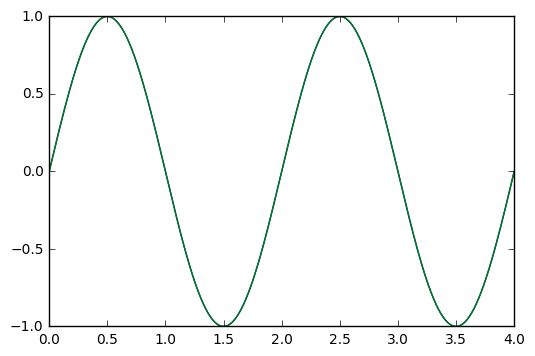

In [59]:
T=np.arange(0,cycles/f,1e-4)
w = 2*np.pi*f
Y=np.sin(w*T)
Y2=np.sin(w*T)
matplotlib.pyplot.plot(T,Y,T,Y2)

In [60]:
Y

array([ 0.        ,  0.00031416,  0.00062832, ..., -0.00094248,
       -0.00062832, -0.00031416])

In [62]:
T_, Y_, xout = signal.lsim(sys2, U=Y, T=T, X0=X[0])

In [63]:
plot = matplotlib.pyplot.plot

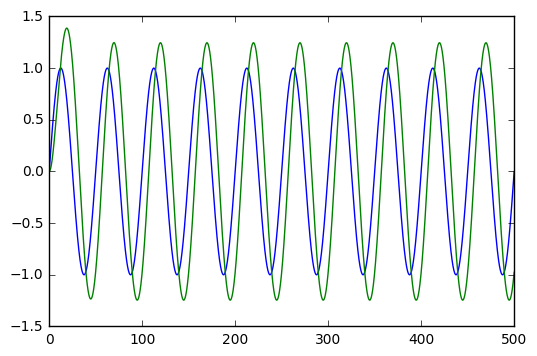

In [77]:
cycles = 10 # Number of cycles to generate
f=2*10e-3 # Hz

T=np.arange(0,cycles/f,1e-2)
w = 2*np.pi*f
Y=np.sin(w*T)
T_, Y_, xout = signal.lsim(sys2, U=Y, T=T, X0=Y[0])
plot(T,Y,T_,Y_)

In [93]:
t0=np.where(8/f<=T)[0][0]

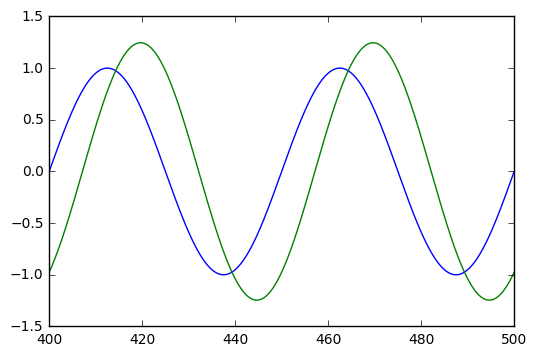

In [94]:
plot(T[t0:],Y[t0:],T_[t0:],Y_[t0:])

In [95]:
from scipy.optimize import minimize, rosen, rosen_der

In [99]:
np.sum((np.array([0,1,2])- np.array([0.5,1.5,0.5]))**2)

2.75

In [100]:
def func(T, A, Phase):
    return A*np.sin(w*T+Phase)

import scipy.optimize as optimization

In [101]:
x0 = [1, 0]

In [107]:
xdata=T_[t0:]-T_[t0]
ydata=Y_[t0:]

In [133]:
(Gain, Phase), B = optimization.curve_fit(func, xdata, ydata, x0)

In [134]:
Gain

1.2453538207169446

In [135]:
Phase

-0.89863709305628914

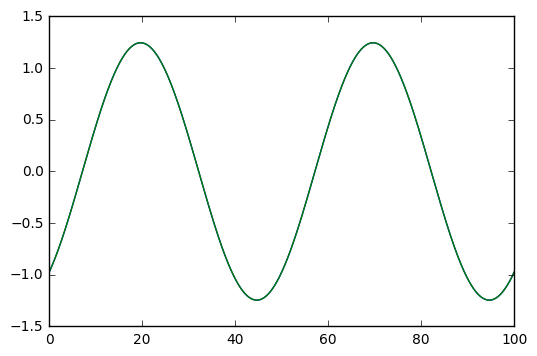

In [112]:
plot(xdata,ydata,xdata, func(xdata,A[0],A[1]))

In [121]:
?control.matlab.bode

In [122]:
?signal.bode

In [118]:
f

0.02

In [126]:
# w : 1D ndarray
#     Frequency array [rad/s]
# mag : 1D ndarray
#     Magnitude array [dB]
# phase : 1D ndarray
#     Phase array [deg]
w, mag, phase = signal.bode(sys2, w)

In [127]:
mag

array([ 1.90585629])

In [132]:
20*np.log10(A[0])

1.9058551499873011